# **Problem Statement**


***To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.***

Load Python Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
import PIL
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Load Dataset

In [4]:
#connect to gdrive and mount it
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
# get the train & test folder path location in gdrive
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test  = pathlib.Path("/content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [6]:
#list directory in train folder
dir_train = os.listdir(data_dir_train)
dir_train.sort()
dir_train

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [7]:
#list dir in test folder
dir_test = os.listdir(data_dir_test)
dir_test.sort()
dir_test

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [8]:
#both test & train have same folders (disease folder ), now check the no. of datapoints in each folder

#total train dataset
total_train_data = len(list(data_dir_train.glob("*/*.jpg")))
total_train_data

2239

In [9]:
#total test dataset
total_test_data = len(list(data_dir_test.glob("*/*.jpg")))
total_test_data

118

In [10]:
# train data in each folders
data_detail_pd = pd.DataFrame(columns=["Dir_Name","Total Image(Train)","Total Percentage(Train)","Total Image(Test)","Total Percentage(Test)"])

for dir_name in dir_train:
   total_image_in_folder = len(list(data_dir_train.glob(dir_name+"/*.jpg")))
   df = {"Dir_Name":dir_name,"Total Image(Train)":total_image_in_folder,"Total Percentage(Train)":round((total_image_in_folder/total_train_data)*100,2)}
   data_detail_pd = data_detail_pd.append(df,ignore_index=True)

data_detail_pd = data_detail_pd.set_index("Dir_Name")
#display(data_detail_pd.sort_values(by="Total Percentage(Train)",ascending=False))

In [11]:
# test data in each folders

for dir_name in dir_test:
   total_image_in_folder = len(list(data_dir_test.glob(dir_name+"/*.jpg")))
   data_detail_pd.loc[dir_name,"Total Image(Test)"]  = total_image_in_folder
   data_detail_pd.loc[dir_name,"Total Percentage(Test)"]  = round((total_image_in_folder/total_train_data)*100,2)
display(data_detail_pd.sort_values(by="Total Percentage(Train)",ascending=False))

,Total Image(Train),Total Percentage(Train),Total Image(Test),Total Percentage(Test)
Dir_Name,,,,
pigmented benign keratosis,462,20.63,16.0,0.71
melanoma,438,19.56,16.0,0.71
basal cell carcinoma,376,16.79,16.0,0.71
nevus,357,15.94,16.0,0.71
squamous cell carcinoma,181,8.08,16.0,0.71
vascular lesion,139,6.21,3.0,0.13
actinic keratosis,114,5.09,16.0,0.71
dermatofibroma,95,4.24,16.0,0.71
seborrheic keratosis,77,3.44,3.0,0.13


Observation : Melanoma has 20% of data in train and 0.71% data in test data set.

---



Highest Sample of Data : pigmented benign keratosis

---


Lowest Sample of Data  : seborrheic keratosis


# ***DataSet Visualization***

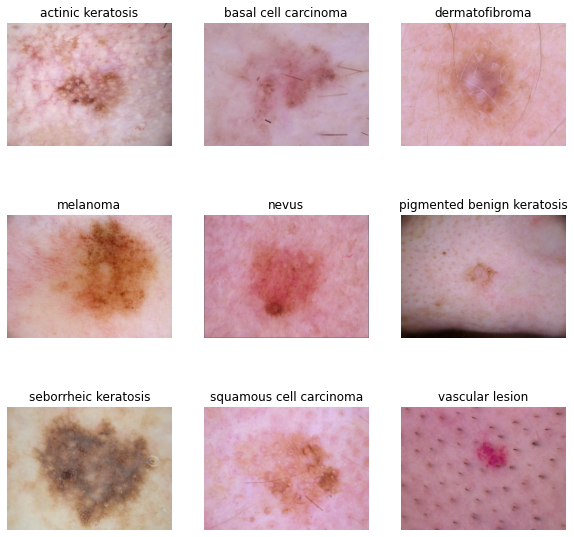

In [12]:
#get one image from each folder
import glob
import matplotlib.image as mpimg

file_path = []
class_name = []

#get one file path from each folder
for dir_name in dir_train:
  path = str(data_dir_train) +"/"+ dir_name
  for file_name in glob.iglob(path+'/*.jpg', recursive=True):
    #print(file_name)
    file_path.append(file_name)
    class_name.append(dir_name)
    break


#display one image from each folder
plt.figure(figsize=(10,10))
for i in range(len(class_name)):
  ax = plt.subplot(3,3,i+1) 
  img = mpimg.imread(file_path[i])
  plt.imshow(img)
  plt.axis("off")
  plt.title(class_name[i])

# Load Images For the CNN Model Inputs

In [13]:
#data loader params
batch_size = 32
img_height = 180
img_width = 180

In [14]:
# load train dataset in batches of size 32, resize the image into 180*180 pixel
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [15]:
# load validation dataset in batches of size 32, resize the image into 180*180 pixel
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size

)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [16]:
# its a multiclassifier so lets see its number of different labels / classes

num_classes = len(val_ds.class_names)
num_classes

9

In [17]:
#class names
val_ds.class_names


['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Configure Dataset for Performance

In [18]:
#Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.
#Dataset.prefetch() overlaps data preprocessing and model execution while training.

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# M1 Model (Base Model)

In [19]:
#model design ( CNN Model)

model = Sequential([
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dense(num_classes)
])

In [20]:
# model compilation

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [21]:
#model design summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [22]:
#train the model : run the model on train & validation set
epochs = 30 
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)

Epoch 1/30
56/56 [==============================] - 267s 987ms/step - loss: 1.9772 - accuracy: 0.2701 - val_loss: 1.6944 - val_accuracy: 0.4362
Epoch 2/30
56/56 [==============================] - 3s 61ms/step - loss: 1.6267 - accuracy: 0.4169 - val_loss: 1.5754 - val_accuracy: 0.3982
Epoch 3/30
56/56 [==============================] - 3s 61ms/step - loss: 1.4790 - accuracy: 0.4816 - val_loss: 1.4119 - val_accuracy: 0.5324
Epoch 4/30
56/56 [==============================] - 3s 61ms/step - loss: 1.3179 - accuracy: 0.5329 - val_loss: 1.4373 - val_accuracy: 0.5302
Epoch 5/30
56/56 [==============================] - 3s 62ms/step - loss: 1.2732 - accuracy: 0.5552 - val_loss: 1.3455 - val_accuracy: 0.5481
Epoch 6/30
56/56 [==============================] - 3s 62ms/step - loss: 1.1905 - accuracy: 0.5854 - val_loss: 1.4382 - val_accuracy: 0.5324
Epoch 7/30
56/56 [==============================] - 3s 61ms/step - loss: 1.1780 - accuracy: 0.5809 - val_loss: 1.5479 - val_accuracy: 0.4899
Epoch 8/30

Text(0.5, 1.0, 'Training & Validation Loss')

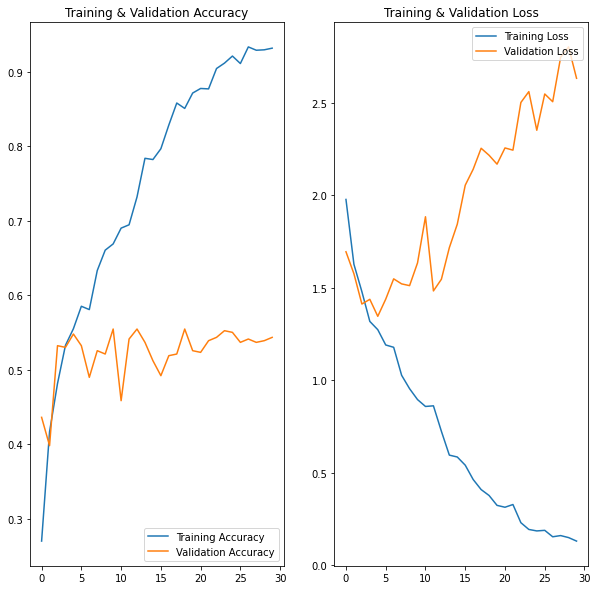

In [23]:
# accuracy & loss graph


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training & Validation Loss')

# Observation



1.   Training Accuracy : Training Accuracy is high 
2.   Validation Accuracy : Validation accuracy is low compared to the Training Accuracy so , its not a good model.
3.   Training Loss : Its decerasing 
4.   Validation Loss : its increasing per epoch so not a good fit




# M2 Model ( With Augumentation)

In [24]:
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

In [25]:
model = Sequential([
         data_augument,
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dense(num_classes)
])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [27]:
# model compilation

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [28]:
#train the model : run the model on train & validation set
epochs = 30 
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)

Epoch 1/30
56/56 [==============================] - 6s 74ms/step - loss: 2.0248 - accuracy: 0.2729 - val_loss: 1.8481 - val_accuracy: 0.3154
Epoch 2/30
56/56 [==============================] - 4s 72ms/step - loss: 1.6642 - accuracy: 0.4051 - val_loss: 1.5870 - val_accuracy: 0.4295
Epoch 3/30
56/56 [==============================] - 4s 72ms/step - loss: 1.4751 - accuracy: 0.4927 - val_loss: 1.3984 - val_accuracy: 0.5414
Epoch 4/30
56/56 [==============================] - 4s 72ms/step - loss: 1.4068 - accuracy: 0.5095 - val_loss: 1.4275 - val_accuracy: 0.5190
Epoch 5/30
56/56 [==============================] - 4s 72ms/step - loss: 1.3411 - accuracy: 0.5229 - val_loss: 1.4037 - val_accuracy: 0.5123
Epoch 6/30
56/56 [==============================] - 4s 71ms/step - loss: 1.2912 - accuracy: 0.5273 - val_loss: 1.4194 - val_accuracy: 0.5168
Epoch 7/30
56/56 [==============================] - 4s 72ms/step - loss: 1.2644 - accuracy: 0.5346 - val_loss: 1.3419 - val_accuracy: 0.5101
Epoch 8/30
56

### Observation : just by adding augumentation it wont help us , so lets add the drop out as well 



# M3 Model ( With Augumentation & droupout)

In [30]:
model = Sequential([
         data_augument,
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Dropout(0.2), # droupout layer
         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dense(num_classes)
])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [32]:
# model compilation

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [33]:
#train the model : run the model on train & validation set
epochs = 30 
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)

Epoch 1/30
56/56 [==============================] - 5s 75ms/step - loss: 2.0832 - accuracy: 0.2031 - val_loss: 1.9022 - val_accuracy: 0.2774
Epoch 2/30
56/56 [==============================] - 4s 72ms/step - loss: 1.8070 - accuracy: 0.3398 - val_loss: 1.7121 - val_accuracy: 0.4049
Epoch 3/30
56/56 [==============================] - 4s 72ms/step - loss: 1.6268 - accuracy: 0.4074 - val_loss: 1.5210 - val_accuracy: 0.4765
Epoch 4/30
56/56 [==============================] - 4s 72ms/step - loss: 1.5503 - accuracy: 0.4375 - val_loss: 1.5118 - val_accuracy: 0.4832
Epoch 5/30
56/56 [==============================] - 4s 72ms/step - loss: 1.5193 - accuracy: 0.4632 - val_loss: 1.4551 - val_accuracy: 0.4966
Epoch 6/30
56/56 [==============================] - 4s 72ms/step - loss: 1.4204 - accuracy: 0.4955 - val_loss: 1.4610 - val_accuracy: 0.4922
Epoch 7/30
56/56 [==============================] - 4s 72ms/step - loss: 1.3884 - accuracy: 0.5100 - val_loss: 1.5769 - val_accuracy: 0.4720
Epoch 8/30
56

In [34]:
# slight increase in accuracy, so lets add droupout to More Layers

# M4 Model ( with Augumentation + Droupouts ( to additional Layers))

In [35]:
model = Sequential([
         data_augument,
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),

         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(128,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Dropout(0.25), # droupout layer

         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dropout(0.25), # droupout layer
         
         layers.Dense(num_classes)
])

In [36]:
# model compilation

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [37]:
#train the model : run the model on train & validation set
epochs = 30 
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)

Epoch 1/30
56/56 [==============================] - 6s 83ms/step - loss: 2.0898 - accuracy: 0.1825 - val_loss: 2.0268 - val_accuracy: 0.1924
Epoch 2/30
56/56 [==============================] - 4s 78ms/step - loss: 1.9514 - accuracy: 0.2902 - val_loss: 1.8270 - val_accuracy: 0.3490
Epoch 3/30
56/56 [==============================] - 4s 78ms/step - loss: 1.7939 - accuracy: 0.3588 - val_loss: 1.7587 - val_accuracy: 0.3937
Epoch 4/30
56/56 [==============================] - 4s 78ms/step - loss: 1.6970 - accuracy: 0.3694 - val_loss: 1.6226 - val_accuracy: 0.4385
Epoch 5/30
56/56 [==============================] - 4s 78ms/step - loss: 1.6485 - accuracy: 0.4001 - val_loss: 1.6069 - val_accuracy: 0.4497
Epoch 6/30
56/56 [==============================] - 4s 78ms/step - loss: 1.6531 - accuracy: 0.4023 - val_loss: 1.5532 - val_accuracy: 0.4631
Epoch 7/30
56/56 [==============================] - 4s 78ms/step - loss: 1.5867 - accuracy: 0.4403 - val_loss: 1.6851 - val_accuracy: 0.4273
Epoch 8/30
56

Text(0.5, 1.0, 'Training & Validation Loss')

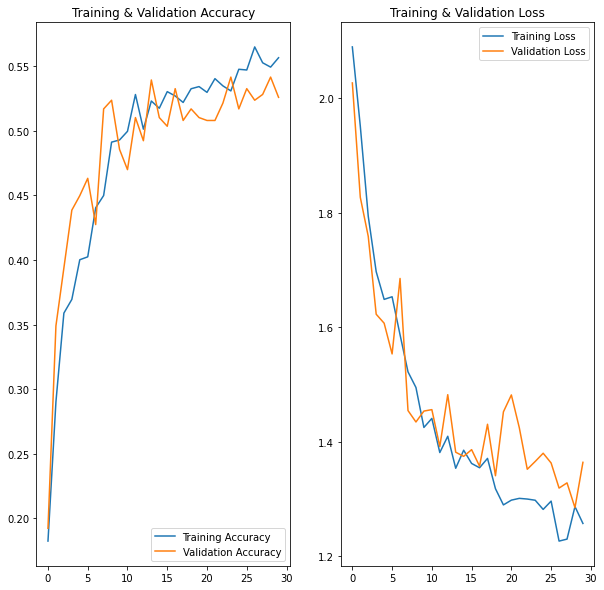

In [38]:
# accuracy & loss graph

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training & Validation Loss')

### Observation : Now model has no Overfitting  : as both train & validation accuracy overlap

# M5 model : Additional Experiment with Dropouts

In [40]:
model = Sequential([
         data_augument,
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),

         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         #layers.Dropout(0.25), # droupout layer

         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         #layers.Dropout(0.25), # droupout layer

         layers.Conv2D(128,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         #layers.Dropout(0.25), # droupout layer

         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dropout(0.25), # droupout layer
         
         layers.Dense(num_classes)
])

In [41]:
#model design overview

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [42]:
# model compilation

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [43]:
#train the model : run the model on train & validation set
epochs = 30 
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)

Epoch 1/30
56/56 [==============================] - 6s 80ms/step - loss: 2.0589 - accuracy: 0.2243 - val_loss: 1.9957 - val_accuracy: 0.2483
Epoch 2/30
56/56 [==============================] - 4s 76ms/step - loss: 1.9310 - accuracy: 0.2690 - val_loss: 1.8891 - val_accuracy: 0.2975
Epoch 3/30
56/56 [==============================] - 4s 76ms/step - loss: 1.8487 - accuracy: 0.3097 - val_loss: 1.9275 - val_accuracy: 0.2886
Epoch 4/30
56/56 [==============================] - 4s 76ms/step - loss: 1.7490 - accuracy: 0.3627 - val_loss: 1.6704 - val_accuracy: 0.4116
Epoch 5/30
56/56 [==============================] - 4s 76ms/step - loss: 1.7095 - accuracy: 0.3811 - val_loss: 1.6876 - val_accuracy: 0.4139
Epoch 6/30
56/56 [==============================] - 4s 76ms/step - loss: 1.6117 - accuracy: 0.4235 - val_loss: 1.5614 - val_accuracy: 0.4631
Epoch 7/30
56/56 [==============================] - 4s 76ms/step - loss: 1.5640 - accuracy: 0.4381 - val_loss: 1.4828 - val_accuracy: 0.4832
Epoch 8/30
56

#  M6 Model ( Augumetation + Batch Normalization + Droupouts )

In [44]:
model = Sequential([
         data_augument,
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.BatchNormalization(),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.BatchNormalization(),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.BatchNormalization(),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(128,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.BatchNormalization(),
         layers.Dropout(0.25), # droupout layer

         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         
         layers.Dense(num_classes)
])

In [45]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 16)       64        
 ormalization)                                                   
                                                                 
 dropout_6 (Dropout)         (None, 90, 90, 16)       

In [46]:
# model compilation

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [47]:
#train the model : run the model on train & validation set
epochs = 30 
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)

Epoch 1/30
56/56 [==============================] - 7s 99ms/step - loss: 2.2934 - accuracy: 0.3393 - val_loss: 4.3172 - val_accuracy: 0.1499
Epoch 2/30
56/56 [==============================] - 5s 83ms/step - loss: 1.6514 - accuracy: 0.4113 - val_loss: 5.0944 - val_accuracy: 0.0492
Epoch 3/30
56/56 [==============================] - 5s 83ms/step - loss: 1.5596 - accuracy: 0.4397 - val_loss: 6.0698 - val_accuracy: 0.0447
Epoch 4/30
56/56 [==============================] - 5s 84ms/step - loss: 1.4726 - accuracy: 0.4916 - val_loss: 6.3180 - val_accuracy: 0.0805
Epoch 5/30
56/56 [==============================] - 5s 83ms/step - loss: 1.4198 - accuracy: 0.4978 - val_loss: 9.5111 - val_accuracy: 0.0604
Epoch 6/30
56/56 [==============================] - 5s 86ms/step - loss: 1.3324 - accuracy: 0.5279 - val_loss: 6.0722 - val_accuracy: 0.1723
Epoch 7/30
56/56 [==============================] - 5s 85ms/step - loss: 1.3060 - accuracy: 0.5307 - val_loss: 5.1137 - val_accuracy: 0.1633
Epoch 8/30
56

In [47]:
# Observation : No Additional improvement, its due to very less data points so lets increase the data points

# Using Another Way of Augmentation to Handle Class Imbalance

### Using Augmentor Pipeline ( Add additional Images )

In [60]:
# install Augmentor
!pip install Augmentor

In [61]:
import Augmentor

In [63]:
# add 500 new sample to each folder
for class_name in data_detail_pd.index:
  #print(class_name)
  p = Augmentor.Pipeline(str(data_dir_train)+"/"+class_name,save_format='.jpg')
  p.rotate(probability=0.7,max_left_rotation=10,max_right_rotation=10)
  p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F053F4C7750>: 100%|██████████| 500/500 [00:23<00:00, 21.72 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F053D36A150>: 100%|██████████| 500/500 [00:21<00:00, 23.18 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F053F3F6290>: 100%|██████████| 500/500 [00:22<00:00, 22.18 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F053D598890>: 100%|██████████| 500/500 [01:48<00:00,  4.61 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F05B6BE5910>: 100%|██████████| 500/500 [02:00<00:00,  4.14 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F05B5C43F50>: 100%|██████████| 500/500 [00:22<00:00, 21.93 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F053C23FC10>: 100%|██████████| 500/500 [00:52<00:00,  9.45 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F053D58F590>: 100%|██████████| 500/500 [00:22<00:00, 22.56 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F06345ED050>: 100%|██████████| 500/500 [00:22<00:00, 22.42 Samples/s]


In [53]:
data_detail_pd.index

Index(['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma',
       'melanoma', 'nevus', 'pigmented benign keratosis',
       'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'],
      dtype='object', name='Dir_Name')

In [56]:
data_dir_train

PosixPath('/content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [64]:
#count of additional images added

additional_images_added = len(list(data_dir_train.glob("*/output/*jpg")))
additional_images_added

4500

Now train the Model on the Additional Images Obtained via Augmentor ( 4500 Images) + Original Images ( 2239 Images)

In [65]:
# we need to reinitalize the train_ds & val_ds
train_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [66]:
#validation dataset

val_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [67]:
# AutoTune & cache for performance

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [68]:
# Model Defination

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [69]:
# model compilation

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [70]:
#model design

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Batc  (None, 90, 90, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_10 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 90, 90, 32)       

In [72]:
# run the model to fit train datapoint and check accuracy on validation dataset

epochs = 30
history = model.fit(
  train_ds_new,
  validation_data=val_ds_new,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 34s 191ms/step - loss: 1.2694 - accuracy: 0.5343 - val_loss: 1.8261 - val_accuracy: 0.3356
Epoch 2/30
169/169 [==============================] - 34s 191ms/step - loss: 0.9921 - accuracy: 0.6397 - val_loss: 1.1812 - val_accuracy: 0.6040
Epoch 3/30
169/169 [==============================] - 34s 192ms/step - loss: 0.8423 - accuracy: 0.6894 - val_loss: 1.6125 - val_accuracy: 0.4497
Epoch 4/30
169/169 [==============================] - 35s 197ms/step - loss: 0.7116 - accuracy: 0.7446 - val_loss: 0.7753 - val_accuracy: 0.7248
Epoch 5/30
169/169 [==============================] - 34s 194ms/step - loss: 0.5812 - accuracy: 0.7891 - val_loss: 1.5386 - val_accuracy: 0.5101
Epoch 6/30
169/169 [==============================] - 36s 205ms/step - loss: 0.5382 - accuracy: 0.8082 - val_loss: 0.6539 - val_accuracy: 0.7562
Epoch 7/30
169/169 [==============================] - 35s 201ms/step - loss: 0.4427 - accuracy: 0.8390 - val_loss: 0.8953 - val_ac

Text(0.5, 1.0, 'Training & Validation Loss')

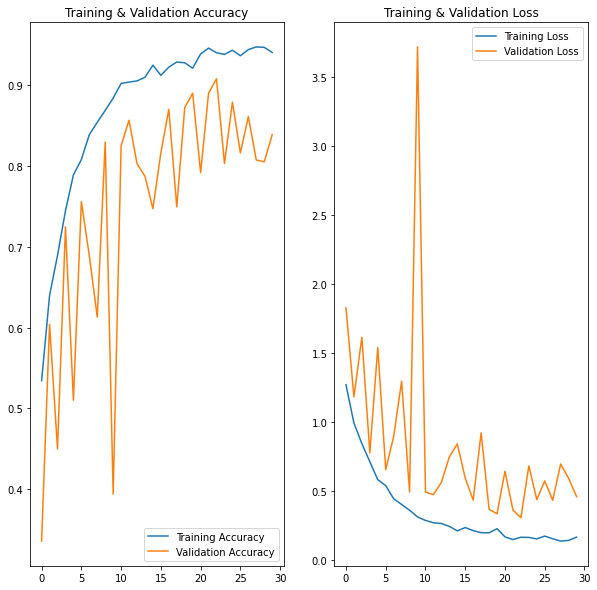

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training & Validation Loss')

# Now we have good train accuracy ( 94% ) and Validation Accuracy (84%)

# Analysis on Test Data

In [76]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.


In [77]:
loss , accuracy = model.evaluate(test_ds)

4/4 [==============================] - 23s 93ms/step - loss: 7.3863 - accuracy: 0.3729


In [78]:
print("Accuracy on test data ", accuracy)

Accuracy on test data  0.37288135290145874


# Prediction on New Test Data

In [79]:
melanoma_path = "/content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/ISIC_0000002.jpg"

img = tf.keras.utils.load_img(
    melanoma_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(score)

tf.Tensor(
[2.5021658e-16 1.0945042e-17 6.4754052e-10 2.1972028e-05 9.9483782e-01
 5.1402496e-03 6.1614842e-09 1.5912991e-23 2.4429672e-13], shape=(9,), dtype=float32)


In [85]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(test_ds.class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to nevus with a 99.48 percent confidence.
